<a href="https://colab.research.google.com/github/LuisPablo19/Evaluacion/blob/main/Evaluacion_etapa3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad 5 (Evaluación)**
##Luis Pablo Padilla Barbosa
##A00572040

In [1]:
!pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.5/215.5 kB 2.2 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=3c17ce3a23780e4ed3c50c6c76262824124e909d02764958617860ad7298ff23
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files 
from funpymodeling.exploratory import freq_tbl 

In [24]:
EUA = pd.read_csv("California_EUA (Limpio).csv", encoding = "unicode_escape", index_col = 'Unnamed: 0')
Mexico = pd.read_csv("DF_Mexico (Limpio).csv", index_col = 'Unnamed: 0')
Espana = pd.read_csv("Girona_España (Limpio).csv", encoding = "unicode_escape", index_col = 'Unnamed: 0')

<ipython-input-24-fff14926e304>:2: DtypeWarning: Columns (1,15) have mixed types. Specify dtype option on import or set low_memory=False.
  Mexico = pd.read_csv("DF_Mexico (Limpio).csv", index_col = 'Unnamed: 0')
<ipython-input-24-fff14926e304>:3: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  Espana = pd.read_csv("Girona_España (Limpio).csv", encoding = "unicode_escape", index_col = 'Unnamed: 0')


##**host_response_time**

In [64]:
nombre_columna = 'host_response_time'

In [65]:
tabla= freq_tbl(EUA[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index_EUA= Filtro.set_index(nombre_columna)
Filtro_index_EUA

,frequency,percentage,cumulative_perc
host_response_time,,,
within an hour,4895,0.705738,0.705738
within a few hours,1333,0.192186,0.897924
within a day,550,0.079296,0.977220
a few days or more,158,0.022780,1.000000


In [66]:
tabla= freq_tbl(Mexico[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index_MX= Filtro.set_index(nombre_columna)
Filtro_index_MX

,frequency,percentage,cumulative_perc
host_response_time,,,
within an hour,19397,0.800669,0.800735
within a few hours,2269,0.093660,0.894402
within a day,1709,0.070544,0.964952
a few days or more,847,0.034962,0.999917


In [67]:
tabla= freq_tbl(Espana[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index_ESP= Filtro.set_index(nombre_columna)
Filtro_index_ESP

,frequency,percentage,cumulative_perc
host_response_time,,,
within an hour,13659,0.694902,0.694938
within a few hours,3056,0.155474,0.850420
within a day,2472,0.125763,0.976189
a few days or more,467,0.023759,0.999949


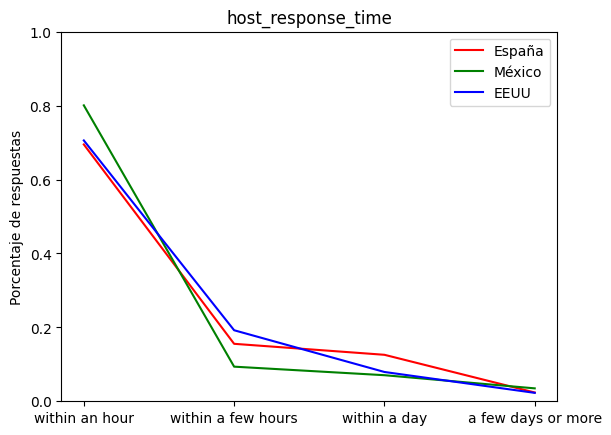

In [68]:
plt.plot(Filtro_index_ESP.index, Filtro_index_ESP['percentage'], label = 'España', color = 'red')
plt.plot(Filtro_index_MX.index, Filtro_index_MX['percentage'], label = 'México', color = 'green')
plt.plot(Filtro_index_EUA.index, Filtro_index_EUA['percentage'], label = 'EEUU', color = 'blue')
plt.legend()
plt.title(nombre_columna)
plt.ylim(0,1)
plt.ylabel('Porcentaje de respuestas')
#plt.xticks(rotation=70)
plt.show()

##**review_scores_cleanliness**

In [69]:
nombre_columna = 'review_scores_cleanliness'
print(EUA[nombre_columna].describe())
print(Mexico[nombre_columna].describe())
print(Espana[nombre_columna].describe())

count    6936.000000
mean        4.864035
std         0.128966
min         4.460000
25%         4.800000
50%         4.900000
75%         5.000000
max         5.000000
Name: review_scores_cleanliness, dtype: float64
count    24222.000000
mean         4.817686
std          0.155121
min          4.320000
25%          4.700000
50%          4.820000
75%          4.960000
max          5.000000
Name: review_scores_cleanliness, dtype: float64
count    19654.000000
mean         4.635382
std          0.269538
min          3.920000
25%          4.500000
50%          4.600000
75%          4.890000
max          5.000000
Name: review_scores_cleanliness, dtype: float64


In [70]:
EUA1 =pd.DataFrame()
Mexico1 =pd.DataFrame()
Espana1 =pd.DataFrame()
mis_bins = [3.5, 4, 4.5, 4.9, 5]
labels = ['3.5 a 4', '4 a 4.5', '4.5 a 4.9', '4.9 a 5']
EUA1[nombre_columna] = pd.cut(x = EUA[nombre_columna], bins = mis_bins, labels = labels, include_lowest = True)
Mexico1[nombre_columna] = pd.cut(x = Mexico[nombre_columna], bins = mis_bins, labels = labels, include_lowest = True)
Espana1[nombre_columna] = pd.cut(x = Espana[nombre_columna], bins = mis_bins, labels = labels, include_lowest = True)

In [71]:
tabla= freq_tbl(EUA1[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index_EUA= Filtro.set_index(nombre_columna)
Filtro_index_EUA = Filtro_index_EUA.reindex(['3.5 a 4', '4 a 4.5', '4.5 a 4.9','4.9 a 5'])
Filtro_index_EUA = Filtro_index_EUA.fillna(0)
Filtro_index_EUA

,frequency,percentage,cumulative_perc
review_scores_cleanliness,,,
3.5 a 4,0.0,0.000000,0.000000
4 a 4.5,196.0,0.028258,1.000000
4.5 a 4.9,3874.0,0.558535,0.558535
4.9 a 5,2866.0,0.413206,0.971742


In [72]:
tabla= freq_tbl(Mexico1[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index_MX= Filtro.set_index(nombre_columna)
Filtro_index_MX = Filtro_index_MX.reindex(['3.5 a 4', '4 a 4.5', '4.5 a 4.9','4.9 a 5'])
Filtro_index_MX = Filtro_index_MX.fillna(0)
Filtro_index_MX

,frequency,percentage,cumulative_perc
review_scores_cleanliness,,,
3.5 a 4,0.0,0.000000,0.000000
4 a 4.5,1269.0,0.052382,1.000000
4.5 a 4.9,14374.0,0.593329,0.593427
4.9 a 5,8579.0,0.354124,0.947610


In [73]:
tabla= freq_tbl(Espana1[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index_ESP= Filtro.set_index(nombre_columna)
Filtro_index_ESP = Filtro_index_ESP.reindex(['3.5 a 4', '4 a 4.5', '4.5 a 4.9','4.9 a 5'])
Filtro_index_ESP = Filtro_index_ESP.fillna(0)
Filtro_index_ESP

,frequency,percentage,cumulative_perc
review_scores_cleanliness,,,
3.5 a 4,1026,0.052198,1.000000
4 a 4.5,7863,0.400031,0.400071
4.5 a 4.9,6132,0.311966,0.712069
4.9 a 5,4633,0.235704,0.947797


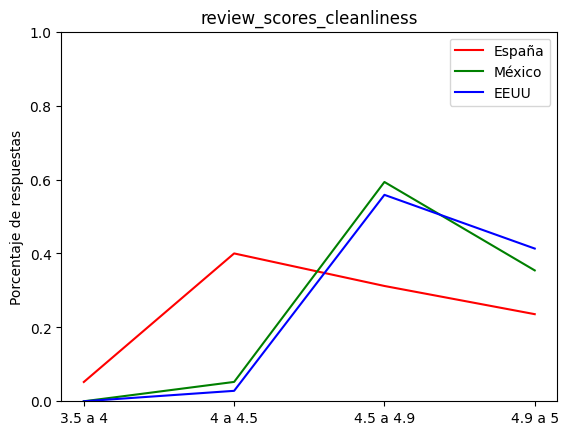

In [74]:
plt.plot(Filtro_index_ESP.index, Filtro_index_ESP['percentage'], label = 'España', color = 'red')
plt.plot(Filtro_index_MX.index, Filtro_index_MX['percentage'], label = 'México', color = 'green')
plt.plot(Filtro_index_EUA.index, Filtro_index_EUA['percentage'], label = 'EEUU', color = 'blue')
plt.legend()
plt.ylim(0,1)
plt.title(nombre_columna)
plt.ylabel('Porcentaje de respuestas')
#plt.xticks(rotation=70)
plt.show()

##**review_scores_communication**

In [75]:
nombre_columna = 'review_scores_communication'
print(EUA[nombre_columna].describe())
print(Mexico[nombre_columna].describe())
print(Espana[nombre_columna].describe())

count    6936.000000
mean        4.939939
std         0.056061
min         4.760000
25%         4.900000
50%         4.940000
75%         5.000000
max         5.000000
Name: review_scores_communication, dtype: float64
count    24222.000000
mean         4.887052
std          0.114511
min          4.500000
25%          4.800000
50%          4.900000
75%          5.000000
max          5.000000
Name: review_scores_communication, dtype: float64
count    19654.000000
mean         4.810120
std          0.167114
min          4.250000
25%          4.700000
50%          4.800000
75%          5.000000
max          5.000000
Name: review_scores_communication, dtype: float64


In [76]:
EUA1 =pd.DataFrame()
Mexico1 =pd.DataFrame()
Espana1 =pd.DataFrame()
mis_bins = [3.5, 4, 4.5, 4.9, 5]
labels = ['3.5 a 4', '4 a 4.5', '4.5 a 4.9', '4.9 a 5']
EUA1[nombre_columna] = pd.cut(x = EUA[nombre_columna], bins = mis_bins, labels = labels, include_lowest = True)
Mexico1[nombre_columna] = pd.cut(x = Mexico[nombre_columna], bins = mis_bins, labels = labels, include_lowest = True)
Espana1[nombre_columna] = pd.cut(x = Espana[nombre_columna], bins = mis_bins, labels = labels, include_lowest = True)

In [77]:
tabla= freq_tbl(EUA1[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index_EUA= Filtro.set_index(nombre_columna)
Filtro_index_EUA = Filtro_index_EUA.reindex(['3.5 a 4', '4 a 4.5', '4.5 a 4.9','4.9 a 5'])
Filtro_index_EUA = Filtro_index_EUA.fillna(0)
Filtro_index_EUA

,frequency,percentage,cumulative_perc
review_scores_communication,,,
3.5 a 4,0.0,0.000000,0.000000
4 a 4.5,0.0,0.000000,0.000000
4.5 a 4.9,3076.0,0.443483,1.000000
4.9 a 5,3860.0,0.556517,0.556517


In [78]:
tabla= freq_tbl(Mexico1[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index_MX= Filtro.set_index(nombre_columna)
Filtro_index_MX = Filtro_index_MX.reindex(['3.5 a 4', '4 a 4.5', '4.5 a 4.9','4.9 a 5'])
Filtro_index_MX = Filtro_index_MX.fillna(0)
Filtro_index_MX

,frequency,percentage,cumulative_perc
review_scores_communication,,,
3.5 a 4,0.0,0.000000,0.000000
4 a 4.5,303.0,0.012507,1.000000
4.5 a 4.9,12065.0,0.498019,0.498101
4.9 a 5,11854.0,0.489309,0.987491


In [79]:
tabla= freq_tbl(Espana1[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index_ESP= Filtro.set_index(nombre_columna)
Filtro_index_ESP = Filtro_index_ESP.reindex(['3.5 a 4', '4 a 4.5', '4.5 a 4.9','4.9 a 5'])
Filtro_index_ESP = Filtro_index_ESP.fillna(0)
Filtro_index_ESP

,frequency,percentage,cumulative_perc
review_scores_communication,,,
3.5 a 4,0.0,0.000000,0.000000
4 a 4.5,1241.0,0.063136,1.000000
4.5 a 4.9,11164.0,0.567969,0.568027
4.9 a 5,7249.0,0.368793,0.936858


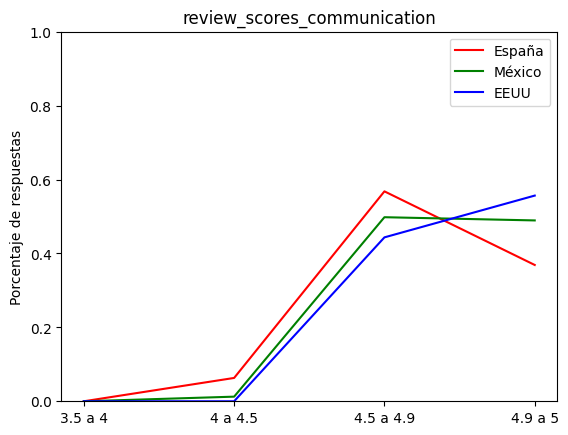

In [80]:
plt.plot(Filtro_index_ESP.index, Filtro_index_ESP['percentage'], label = 'España', color = 'red')
plt.plot(Filtro_index_MX.index, Filtro_index_MX['percentage'], label = 'México', color = 'green')
plt.plot(Filtro_index_EUA.index, Filtro_index_EUA['percentage'], label = 'EEUU', color = 'blue')
plt.legend()
plt.title(nombre_columna)
plt.ylim(0,1)
plt.ylabel('Porcentaje de respuestas')
#plt.xticks(rotation=70)
plt.show()

##**review_scores_location**

In [81]:
nombre_columna = 'review_scores_location'
print(EUA[nombre_columna].describe())
print(Mexico[nombre_columna].describe())
print(Espana[nombre_columna].describe())

count    6936.000000
mean        4.869286
std         0.117525
min         4.500000
25%         4.800000
50%         4.890000
75%         5.000000
max         5.000000
Name: review_scores_location, dtype: float64
count    24222.000000
mean         4.886400
std          0.115037
min          4.500000
25%          4.800000
50%          4.910000
75%          5.000000
max          5.000000
Name: review_scores_location, dtype: float64
count    19654.000000
mean         4.795966
std          0.159660
min          4.300000
25%          4.700000
50%          4.800000
75%          4.970000
max          5.000000
Name: review_scores_location, dtype: float64


In [82]:
EUA1 =pd.DataFrame()
Mexico1 =pd.DataFrame()
Espana1 =pd.DataFrame()
mis_bins = [3.5, 4, 4.5, 4.9, 5]
labels = ['3.5 a 4', '4 a 4.5', '4.5 a 4.9', '4.9 a 5']
EUA1[nombre_columna] = pd.cut(x = EUA[nombre_columna], bins = mis_bins, labels = labels, include_lowest = True)
Mexico1[nombre_columna] = pd.cut(x = Mexico[nombre_columna], bins = mis_bins, labels = labels, include_lowest = True)
Espana1[nombre_columna] = pd.cut(x = Espana[nombre_columna], bins = mis_bins, labels = labels, include_lowest = True)

In [83]:
tabla= freq_tbl(EUA1[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index_EUA= Filtro.set_index(nombre_columna)
Filtro_index_EUA = Filtro_index_EUA.reindex(['3.5 a 4', '4 a 4.5', '4.5 a 4.9','4.9 a 5'])
Filtro_index_EUA = Filtro_index_EUA.fillna(0)
Filtro_index_EUA

,frequency,percentage,cumulative_perc
review_scores_location,,,
3.5 a 4,0.0,0.000000,0.000000
4 a 4.5,112.0,0.016148,1.000000
4.5 a 4.9,4075.0,0.587514,0.587514
4.9 a 5,2749.0,0.396338,0.983852


In [84]:
tabla= freq_tbl(Mexico1[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index_MX= Filtro.set_index(nombre_columna)
Filtro_index_MX = Filtro_index_MX.reindex(['3.5 a 4', '4 a 4.5', '4.5 a 4.9','4.9 a 5'])
Filtro_index_MX = Filtro_index_MX.fillna(0)
Filtro_index_MX

,frequency,percentage,cumulative_perc
review_scores_location,,,
3.5 a 4,0.0,0.000000,0.000000
4 a 4.5,326.0,0.013457,1.000000
4.5 a 4.9,11775.0,0.486048,0.986541
4.9 a 5,12121.0,0.500330,0.500413


In [85]:
tabla= freq_tbl(Espana1[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index_ESP= Filtro.set_index(nombre_columna)
Filtro_index_ESP = Filtro_index_ESP.reindex(['3.5 a 4', '4 a 4.5', '4.5 a 4.9','4.9 a 5'])
Filtro_index_ESP = Filtro_index_ESP.fillna(0)
Filtro_index_ESP

,frequency,percentage,cumulative_perc
review_scores_location,,,
3.5 a 4,0.0,0.000000,0.000000
4 a 4.5,1254.0,0.063797,1.000000
4.5 a 4.9,12290.0,0.625254,0.625318
4.9 a 5,6110.0,0.310847,0.936196


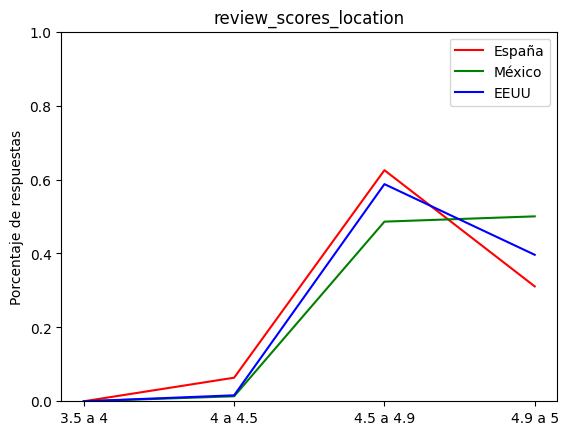

In [86]:
plt.plot(Filtro_index_ESP.index, Filtro_index_ESP['percentage'], label = 'España', color = 'red')
plt.plot(Filtro_index_MX.index, Filtro_index_MX['percentage'], label = 'México', color = 'green')
plt.plot(Filtro_index_EUA.index, Filtro_index_EUA['percentage'], label = 'EEUU', color = 'blue')
plt.legend()
plt.title(nombre_columna)
plt.ylim(0,1)
plt.ylabel('Porcentaje de respuestas')
#plt.xticks(rotation=70)
plt.show()

##**review_scores_value**

In [87]:
nombre_columna = 'review_scores_value'
print(EUA[nombre_columna].describe())
print(Mexico[nombre_columna].describe())
print(Espana[nombre_columna].describe())

count    6936.000000
mean        4.767986
std         0.147962
min         4.340000
25%         4.700000
50%         4.760000
75%         4.860000
max         5.000000
Name: review_scores_value, dtype: float64
count    24222.000000
mean         4.796480
std          0.148139
min          4.350000
25%          4.700000
50%          4.800000
75%          4.920000
max          5.000000
Name: review_scores_value, dtype: float64
count    19654.000000
mean         4.539916
std          0.270585
min          3.880000
25%          4.400000
50%          4.500000
75%          4.750000
max          5.000000
Name: review_scores_value, dtype: float64


In [88]:
EUA1 =pd.DataFrame()
Mexico1 =pd.DataFrame()
Espana1 =pd.DataFrame()
mis_bins = [3.5, 4, 4.5, 4.9, 5]
labels = ['3.5 a 4', '4 a 4.5', '4.5 a 4.9', '4.9 a 5']
EUA1[nombre_columna] = pd.cut(x = EUA[nombre_columna], bins = mis_bins, labels = labels, include_lowest = True)
Mexico1[nombre_columna] = pd.cut(x = Mexico[nombre_columna], bins = mis_bins, labels = labels, include_lowest = True)
Espana1[nombre_columna] = pd.cut(x = Espana[nombre_columna], bins = mis_bins, labels = labels, include_lowest = True)

In [89]:
tabla= freq_tbl(EUA1[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index_EUA= Filtro.set_index(nombre_columna)
Filtro_index_EUA = Filtro_index_EUA.reindex(['3.5 a 4', '4 a 4.5', '4.5 a 4.9','4.9 a 5'])
Filtro_index_EUA = Filtro_index_EUA.fillna(0)
Filtro_index_EUA

,frequency,percentage,cumulative_perc
review_scores_value,,,
3.5 a 4,0.0,0.000000,0.000000
4 a 4.5,464.0,0.066897,1.000000
4.5 a 4.9,5096.0,0.734717,0.734717
4.9 a 5,1376.0,0.198385,0.933103


In [90]:
tabla= freq_tbl(Mexico1[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index_MX= Filtro.set_index(nombre_columna)
Filtro_index_MX = Filtro_index_MX.reindex(['3.5 a 4', '4 a 4.5', '4.5 a 4.9','4.9 a 5'])
Filtro_index_MX = Filtro_index_MX.fillna(0)
Filtro_index_MX

,frequency,percentage,cumulative_perc
review_scores_value,,,
3.5 a 4,0.0,0.000000,0.000000
4 a 4.5,1309.0,0.054033,1.000000
4.5 a 4.9,16431.0,0.678238,0.678350
4.9 a 5,6482.0,0.267564,0.945958


In [91]:
tabla= freq_tbl(Espana1[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index_ESP= Filtro.set_index(nombre_columna)
Filtro_index_ESP = Filtro_index_ESP.reindex(['3.5 a 4', '4 a 4.5', '4.5 a 4.9','4.9 a 5'])
Filtro_index_ESP = Filtro_index_ESP.fillna(0)
Filtro_index_ESP

,frequency,percentage,cumulative_perc
review_scores_value,,,
3.5 a 4,1407,0.071581,1.000000
4 a 4.5,10088,0.513228,0.513280
4.5 a 4.9,5563,0.283018,0.796326
4.9 a 5,2596,0.132072,0.928412


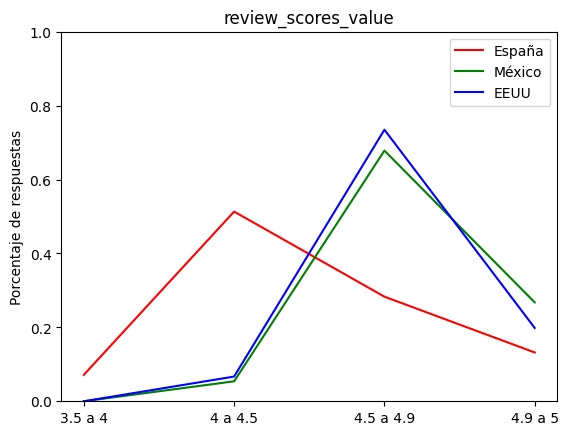

In [92]:
plt.plot(Filtro_index_ESP.index, Filtro_index_ESP['percentage'], label = 'España', color = 'red')
plt.plot(Filtro_index_MX.index, Filtro_index_MX['percentage'], label = 'México', color = 'green')
plt.plot(Filtro_index_EUA.index, Filtro_index_EUA['percentage'], label = 'EEUU', color = 'blue')
plt.legend()
plt.title(nombre_columna)
plt.ylim(0,1)
plt.ylabel('Porcentaje de respuestas')
#plt.xticks(rotation=70)
plt.show()